### **Load libraries**

In [1]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import risk_kit as rk
import importlib

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

### **Load data**

In [4]:
rets = pd.read_csv('selected_stocks_rets.csv', index_col=0)
stocks = pd.read_csv('selected_stocks_stocks.csv', index_col=0)

### **Initial examination**

In [5]:
summary_stats = rk.summary_stats(rets)
summary_stats

,Annualized Return,Annualized Volatility,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
BCOLOMBIA.CL,0.019308,0.152940,0.781011,5.486398,0.057548,0.077796,-0.068219,-0.312086
BHI.CL,0.003055,0.157152,-2.046848,21.835786,0.078827,0.106856,-0.167100,-0.204385
BOGOTA.CL,-0.008247,0.155155,0.253782,5.184385,0.068102,0.103266,-0.240096,-0.355890
BVC.CL,0.046782,0.163775,0.902236,6.288013,0.056875,0.086076,0.099536,-0.222798
CELSIA.CL,0.053518,0.175421,0.747683,4.284635,0.065085,0.087566,0.130277,-0.252929
CEMARGOS.CL,0.148242,0.200862,2.105833,13.920293,0.029916,0.088087,0.572771,-0.210922
CNEC.CL,-0.112146,0.205819,0.122512,7.823188,0.097929,0.142237,-0.672298,-0.774570
CONCONCRET.CL,0.120135,0.260538,2.647519,13.662305,0.029018,0.080848,0.336465,-0.304041
CORFICOLCF.CL,0.006501,0.185053,0.820418,5.014412,0.070632,0.093811,-0.123803,-0.360412
ECOPETROL.CL,0.005228,0.152694,0.666943,4.589455,0.060975,0.080388,-0.158074,-0.314655


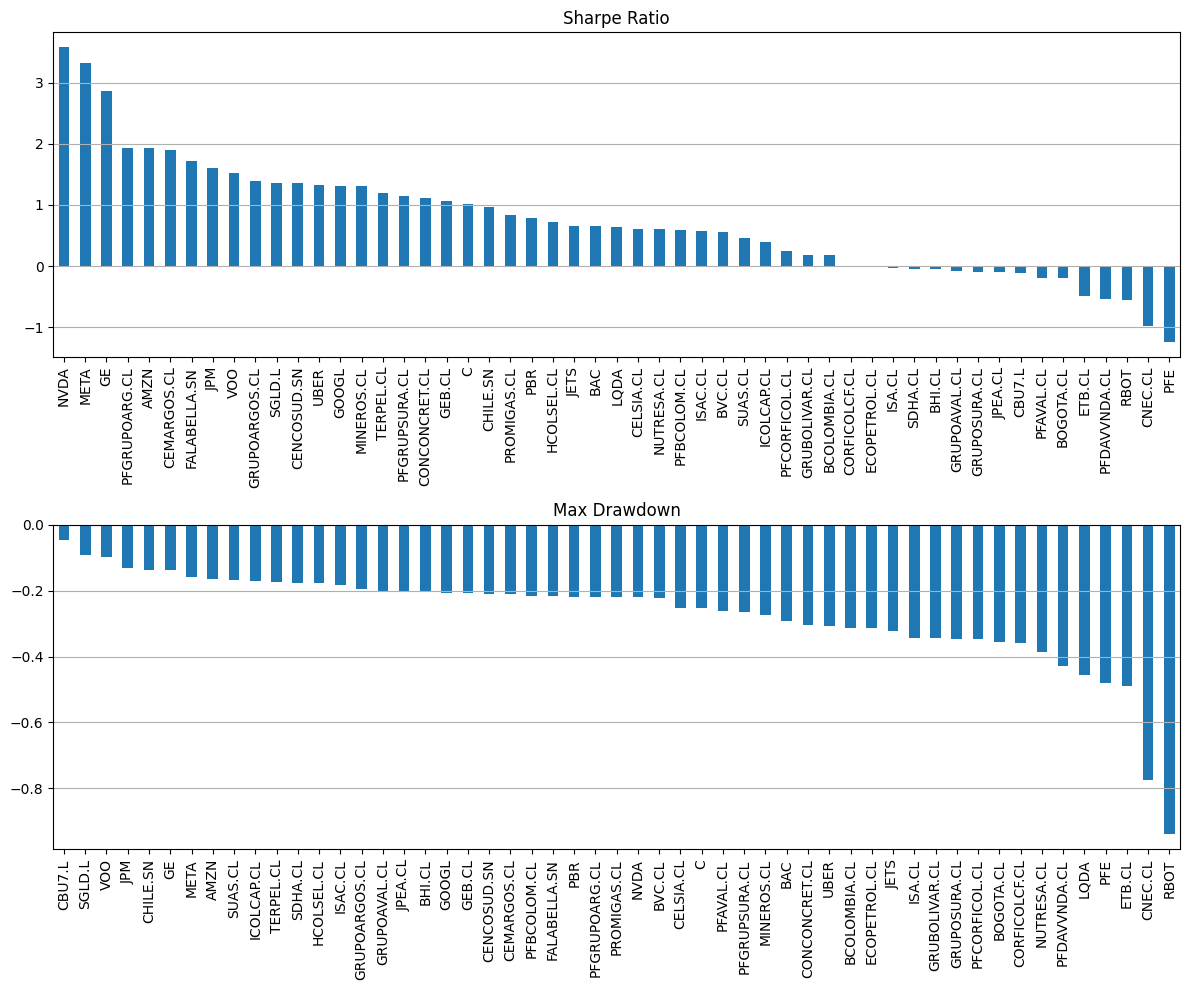

In [6]:
# Plot some return, volatility, and risk rankings to get a view of relevant stocks
periods_per_year = 54   # Define periods_per_year accordingly (Typically 54 for weekly and 12 for monthly)
summary_stats = rk.summary_stats(rets, periods_per_year=periods_per_year)
#plot1_series = summary_stats['Annualized Return'].sort_values(ascending=False)
#plot2_series = summary_stats['Annualized Volatility'].sort_values(ascending=True)
#plot1_series = summary_stats['Cornish-Fisher VaR (5%)'].sort_values(ascending=False)
#plot2_series = summary_stats['Historic CVaR (5%)'].sort_values(ascending=False)
plot1_series = summary_stats['Sharpe Ratio'].sort_values(ascending=False)
plot2_series = summary_stats['Max Drawdown'].sort_values(ascending=False)

fig, axes = plt.subplots(2, 1, figsize=(12, 10))
plot1_series.plot.bar(ax = axes[0], legend=False, title=plot1_series.name)
plot2_series.plot.bar(ax=axes[1], legend=False, title=plot2_series.name)
axes[0].grid(axis='y')
axes[1].grid(axis='y')
plt.tight_layout()

In [7]:
# Identify stock pairs with very high correlation

# Generate correlation matrix
corr_mat = rets.corr()
# Generate a mask to exclude  duplicated pairs
#mask = np.triu(np.ones_like(corr_mat))
#corr_mat = corr_mat*mask
# Convert the matrix into a dataframe structured as a list of pairs with their respective correlations
stack_corr = pd.DataFrame(corr_mat.stack())
stack_corr = stack_corr[stack_corr[0] < 1]
stack_corr = stack_corr[stack_corr[0] != 0]
stack_corr.index.names = ['Stock 1', 'Stock 2']
stack_corr.reset_index(inplace=True)
#(abs(stack_corr[0]) > .7).sum()

# Filter to visualize only the pairs with very high correlations
high_corrs = stack_corr[stack_corr[0] >= 0.8].sort_values(by=0, ascending=False)
high_corrs

,Stock 1,Stock 2,0
1600,BAC,JPM,0.810357
2162,JPM,BAC,0.810357


In [9]:
# Check the average correlation coefficient of each stock
stack_corr.groupby('Stock 1')[0].mean().sort_values(ascending=False)

Stock 1
C                0.218133
ICOLCAP.CL       0.215148
PFBCOLOM.CL      0.204258
VOO              0.198373
PFDAVVNDA.CL     0.196006
JPM              0.195201
HCOLSEL.CL       0.194301
PFCORFICOL.CL    0.184577
PFGRUPSURA.CL    0.180825
BAC              0.180465
GEB.CL           0.178979
CORFICOLCF.CL    0.171191
CELSIA.CL        0.166198
BCOLOMBIA.CL     0.156952
GRUPOARGOS.CL    0.148611
JETS             0.147781
PFGRUPOARG.CL    0.145362
GRUBOLIVAR.CL    0.135543
GRUPOSURA.CL     0.132184
BHI.CL           0.127120
ISA.CL           0.127027
GE               0.122925
MINEROS.CL       0.121946
PFAVAL.CL        0.117976
AMZN             0.111553
ECOPETROL.CL     0.111034
PROMIGAS.CL      0.110921
RBOT             0.108520
SGLD.L           0.094475
GRUPOAVAL.CL     0.092785
TERPEL.CL        0.087257
CEMARGOS.CL      0.085968
CHILE.SN         0.085443
UBER             0.085029
FALABELLA.SN     0.080140
CNEC.CL          0.077720
META             0.075803
LQDA             0.071501
GOOG

### **Identify Combination with the maximum Sharpe-Ratio**

In [14]:
rf_rate = .11   # Currently, the 10-Y  bond yield is at 11.2%

weights = rk.msr(riskfree_rate=rf_rate, return_series=rets, periods_per_year=periods_per_year)
optimal_allocation = pd.DataFrame(data=weights.round(4), index=rets.columns, columns=['Weights'])
optimal_allocation = optimal_allocation[optimal_allocation['Weights'] > 0]
optimal_allocation

,Weights
CEMARGOS.CL,0.1202
CONCONCRET.CL,0.0454
MINEROS.CL,0.0031
NUTRESA.CL,0.0488
PFGRUPOARG.CL,0.0632
TERPEL.CL,0.0563
CENCOSUD.SN,0.0620
FALABELLA.SN,0.0792
GE,0.1213
META,0.1697


<Axes: xlabel='Date'>

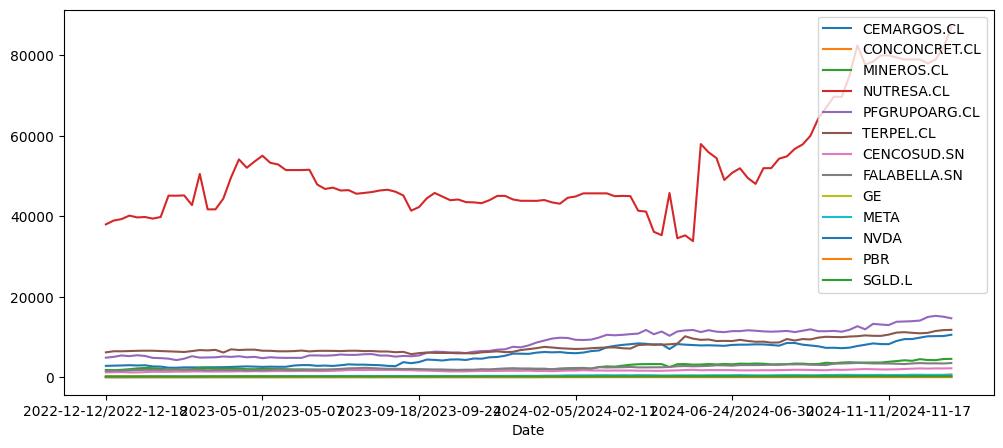

In [15]:
stocks[optimal_allocation.index].plot(figsize=(12, 5))

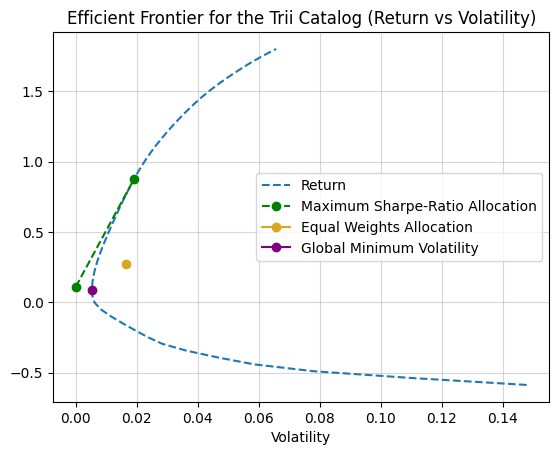

In [16]:
rk.plot_ef(50, style = '--', show_cml=True, show_ew=True, show_gmv=True, riskfree_rate=rf_rate,
           return_series=rets, periods_per_year=periods_per_year)
plt.title('Efficient Frontier for the Trii Catalog (Return vs Volatility)')
plt.grid(alpha=.5)

### **Create an index for the chosen allocation**

In [17]:
# Reduce the portfolio stocks to only those for which shares of over 3% is recommended
chosen_allocation = optimal_allocation[optimal_allocation['Weights'] > .03]
chosen_allocation = chosen_allocation / chosen_allocation.sum()
chosen_allocation

,Weights
CEMARGOS.CL,0.123219
CONCONCRET.CL,0.046540
NUTRESA.CL,0.050026
PFGRUPOARG.CL,0.064787
TERPEL.CL,0.057714
CENCOSUD.SN,0.063557
FALABELLA.SN,0.081189
GE,0.124346
META,0.173962
NVDA,0.138801


In [18]:
# Generate a dataframe to represent the evolution of the allocation in each stock
weights = chosen_allocation['Weights']
allocated_index = (rets[weights.index] + 1).cumprod()*weights

# Add a column to represent the index
allocated_index['index'] = allocated_index.sum(axis='columns')
allocated_index.index = pd.to_datetime(allocated_index.index.str.split('/').str[0])

# Generate a row to represent an earlier period before returns are made,
# corresponding to the time when the index equal 1
first_period = allocated_index.index[0]
starting_period = first_period - pd.offsets.Week(weekday=6)   # Uncomment to generate a week starting period
#starting_period = first_period - pd.offsets.DateOffset(months=1)   # Uncomment to generate a month starting period
starting_period

allocation_start = pd.DataFrame(index=[starting_period], columns=allocated_index.columns)
allocation_start.iloc[:, :-1] = 1*weights
allocation_start['index'] = 1

# Append the row to the allocated_index dataframe
allocated_index = pd.concat([allocation_start, allocated_index], axis='rows')
allocated_index.head()

,CEMARGOS.CL,CONCONCRET.CL,NUTRESA.CL,PFGRUPOARG.CL,TERPEL.CL,CENCOSUD.SN,FALABELLA.SN,GE,META,NVDA,PBR,index
2022-12-11,0.123219,0.04654,0.050026,0.064787,0.057714,0.063557,0.081189,0.124346,0.173962,0.138801,0.075859,1.000000
2022-12-12,0.115988,0.048421,0.045863,0.062924,0.057342,0.063071,0.079648,0.118545,0.17926,0.13529,0.066367,0.972719
2022-12-19,0.117954,0.045211,0.047015,0.065513,0.059865,0.0649,0.084529,0.124986,0.177174,0.124146,0.07855,0.989843
2022-12-26,0.119953,0.04559,0.047452,0.0701,0.059799,0.067163,0.084786,0.128042,0.180626,0.119313,0.075434,0.998259
2023-01-02,0.122619,0.044641,0.048497,0.067871,0.06032,0.062421,0.087864,0.140826,0.195156,0.121313,0.072813,1.024339


In [19]:
# Generate a dataframe with the returns of the index
allocated_index_returns = (allocated_index/allocated_index.shift(1) - 1).dropna()
allocated_index_returns.head()

,CEMARGOS.CL,CONCONCRET.CL,NUTRESA.CL,PFGRUPOARG.CL,TERPEL.CL,CENCOSUD.SN,FALABELLA.SN,GE,META,NVDA,PBR,index
2022-12-12,-0.05868,0.040408,-0.083211,-0.028759,-0.006452,-0.007651,-0.018987,-0.046654,0.030457,-0.025293,-0.125117,-0.027281
2022-12-19,0.016949,-0.0663,0.025111,0.041142,0.044009,0.029008,0.06129,0.054334,-0.011639,-0.082373,0.183565,0.017604
2022-12-26,0.016949,0.008403,0.009299,0.070013,-0.001103,0.034867,0.003039,0.024453,0.019485,-0.038932,-0.039675,0.008502
2023-01-02,0.022222,-0.020833,0.022023,-0.031797,0.008717,-0.070609,0.036303,0.099835,0.080439,0.016765,-0.034742,0.026126
2023-01-09,-0.021739,-0.017021,-0.011214,0.041528,0.009259,0.0027,0.055032,0.114818,0.05353,0.137291,0.054475,0.050422


In [20]:
summary_stats = rk.summary_stats(allocated_index_returns, periods_per_year=allocated_index_returns.shape[0])
summary_stats

,Annualized Return,Annualized Volatility,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
CEMARGOS.CL,2.509977,0.605369,2.105833,13.920293,0.029916,0.088087,3.978938,-0.210922
CONCONCRET.CL,1.802460,0.785224,2.647519,13.662305,0.029018,0.080848,2.192230,-0.304041
NUTRESA.CL,1.099193,0.936924,4.449485,36.573636,-0.070208,0.134745,1.108171,-0.385484
PFGRUPOARG.CL,1.926131,0.478860,0.275052,3.228532,0.060647,0.080463,3.845839,-0.220096
TERPEL.CL,0.890917,0.396118,1.935210,12.433509,0.025097,0.060356,2.110755,-0.172727
CENCOSUD.SN,0.816671,0.319882,-0.104499,3.013980,0.045332,0.060111,2.388393,-0.209088
FALABELLA.SN,1.248371,0.372680,0.793240,4.526032,0.041063,0.055138,3.175127,-0.216035
GE,2.419307,0.388895,0.442410,3.475967,0.044068,0.057790,5.967491,-0.138103
META,4.334016,0.524321,1.086101,6.093757,0.046172,0.066990,7.973690,-0.159385
NVDA,7.000051,0.682679,0.452063,3.748405,0.076587,0.103264,9.918078,-0.220212


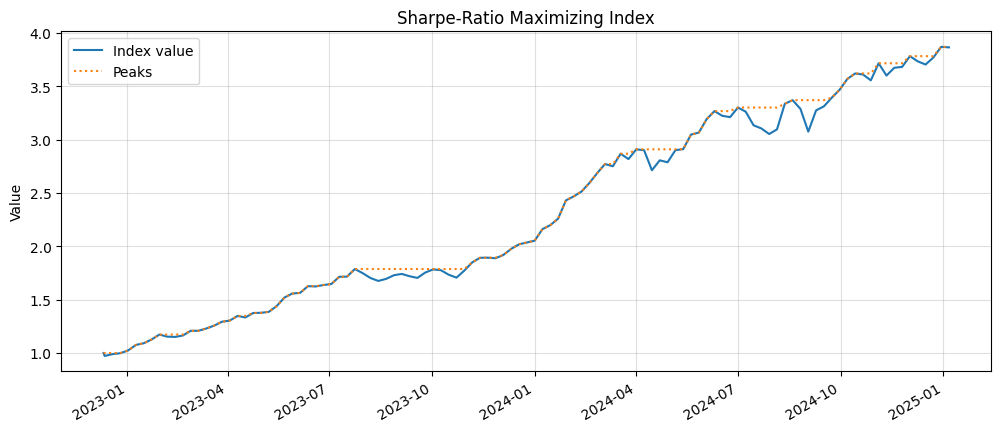

In [21]:
# Visualize the evolution of the index
allocated_index['index'].plot(figsize=(12, 5), label='Index value')
allocated_index['index'].cummax().plot(linestyle=':', label='Peaks')
plt.legend()
plt.ylabel('Value')
plt.title('Sharpe-Ratio Maximizing Index')
plt.grid(alpha=0.4)

### **Export datasets and an index for the Sharpe-Ratio maximizing allocation**

In [22]:
# Allocation index and returns
allocated_index.to_csv('allocated_index.csv')
allocated_index_returns.to_csv('allocated_index_returns.csv')